# 1. Importar librerias

### Si usaras Jupyter Notebook
Estando en la **carpeta raíz del proyecto**, ejecuta en tu terminal el siguiente comando:
```bash
    jupyter notebook
```
NNo deberias tener problemas para cargar las librerias a continuacion:

In [ ]:
import sys
from pathlib import Path
from src.data.load_releases import load_ccd_datasets

### Si usaras Visual Studio Code con su extension de .ipynb

En esta circunstancia, puede ser necesario establecer la ruta raiz absoluta del proyecto

In [27]:
import sys
from pathlib import Path

# 1. Define la ruta ABSOLUTA a la raíz de tu proyecto

project_root = "/Users/rocioperez/Documents/Projects/AFG/Git_Group_Project/eeg-prism" # MODIFICA ESTE VALOR
project_root_path = Path(project_root)
# 2. Añade esta ruta al sys.path
if project_root not in sys.path:
    sys.path.append(str(project_root))

# --- Ahora tu importación original funcionará ---
from src.data.load_releases import load_ccd_datasets

# 2. Cargando los datos locales a EEGChallengeDataset

Una vez ejecutado el script `download_data`, podemos cargar todos los releases concatenados en un EEGChallengeDataset utilizando el metodo `load_ccd_datasets` que se encuentra en `src/data/load_releases.py`

Definimos el directorio donde estan alojados los datos (`DATA_DIR`) y los releases que utilizaremos (`RELEASES`)

In [29]:
DATA_DIR = Path("data")
DATA_DIR = project_root_path / "data"
RELEASES = ["R1", "R2"]

In [30]:
all_datasets = load_ccd_datasets(cache_path=DATA_DIR, release_list=RELEASES, mini = True)

Iniciando la carga de 2 releases...


╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=944066;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=34360;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

  ✅ Cargado exitosamente: R1


╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=2613;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=997622;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

  ✅ Cargado exitosamente: R2
Carga de todos los releases completada.


# 3. Explorar Dataset

<Info | 9 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 50.0 Hz
 meas_date: 2025-08-19 00:01:03 UTC
 nchan: 129
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: sub-NDARAM704GKZ, sex: 1, birthday: 2014-09-08>
>


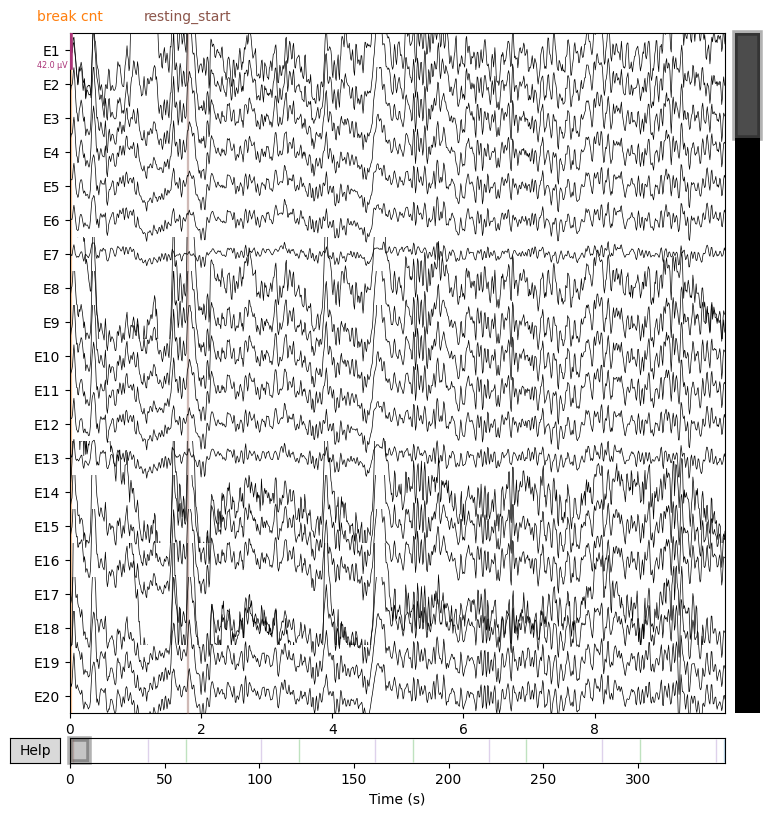

<Annotations | 14 segments: boundary (1), break cnt (1), ...>


In [31]:
raw = all_datasets.datasets[1].raw  # mne.io.Raw object
print(raw.info)

raw.plot(duration=10, scalings="auto", show=True)

print(raw.annotations)

SFREQ = 100